In [1]:
# importacao das bibliotecas utilizadas
import numpy as np
import cv2
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importacao das imagens
bitmap = cv2.imread('imgs/bitmap.pbm',0)

In [3]:
def plt_intermediary_results(img1, img2):
    f = plt.figure(figsize=(20,10))
    
    f.add_subplot(1,2,1)
    plt.imshow(img1,'gray')
    
    f.add_subplot(1,2,2)
    plt.imshow(img2,'gray')
    
    plt.show()

## (1)

In [4]:
bitmap = cv2.bitwise_not(bitmap)

In [5]:
s_elem1 = np.ones((1,100),np.uint8)

In [6]:
bitmap_1 = cv2.dilate(bitmap,s_elem1,iterations=1)

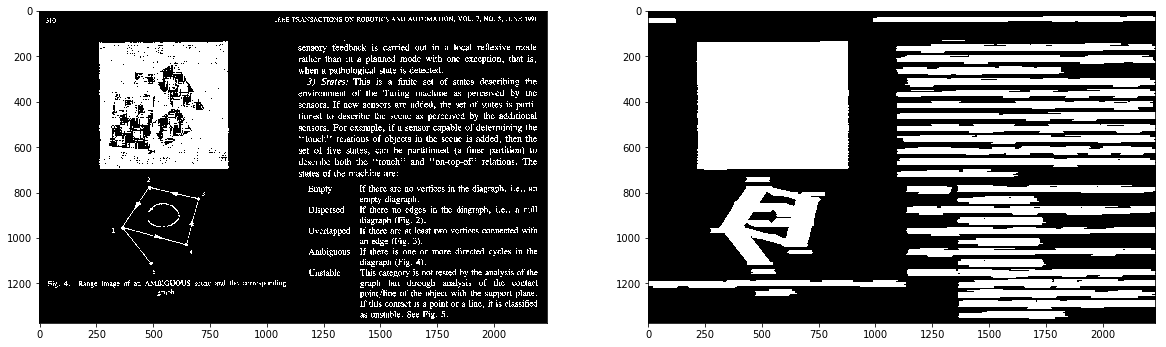

In [7]:
plt_intermediary_results(bitmap,bitmap_1)

## (2)

In [8]:
bitmap_2 = cv2.erode(bitmap_1,s_elem1,iterations=1)

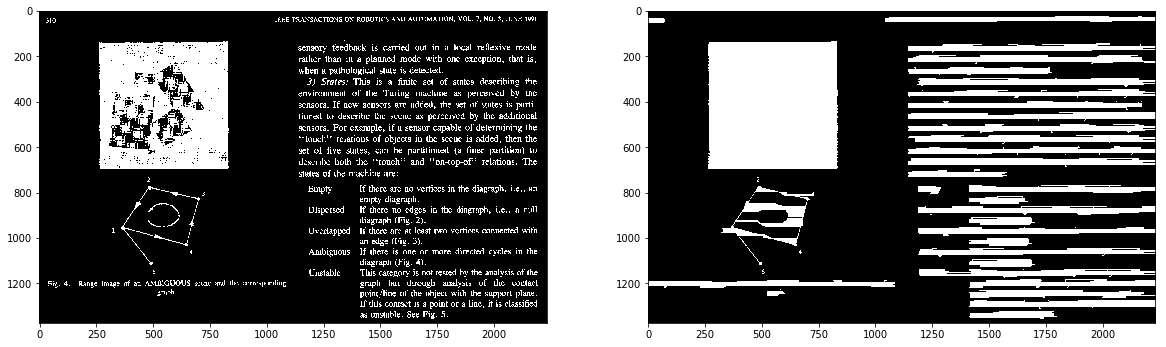

In [9]:
plt_intermediary_results(bitmap,bitmap_2)

## (3)

In [10]:
s_elem2 = np.ones((200,1),np.uint8)

In [11]:
bitmap_3 = cv2.dilate(bitmap,s_elem2,iterations=1)

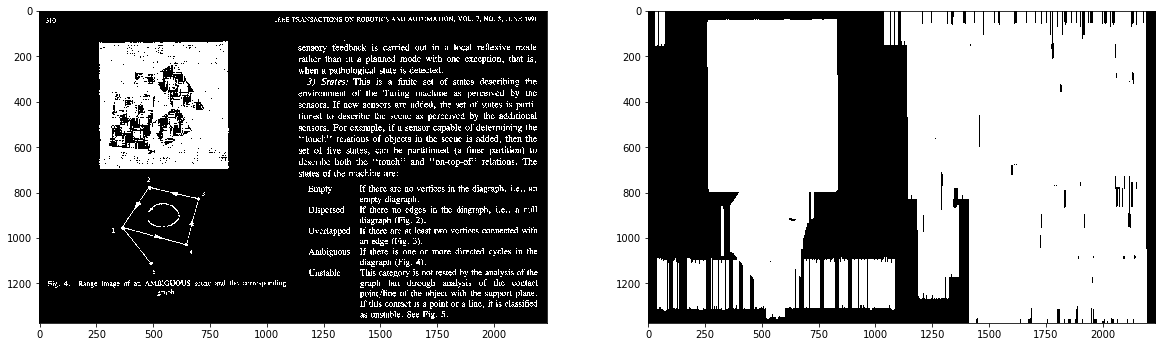

In [12]:
plt_intermediary_results(bitmap,bitmap_3)

## (4)

In [13]:
bitmap_4 = cv2.erode(bitmap_3,s_elem2,iterations=1)

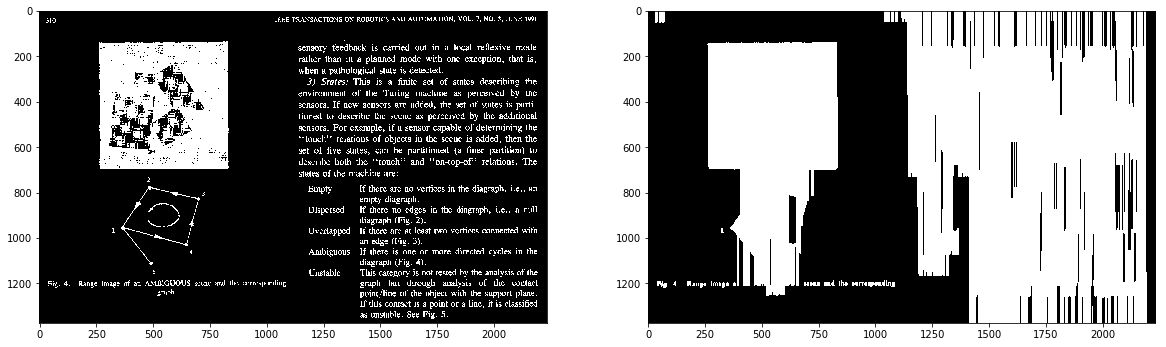

In [14]:
plt_intermediary_results(bitmap,bitmap_4)

## (5)

In [15]:
bitmap_5 = cv2.bitwise_and(bitmap_2,bitmap_4)

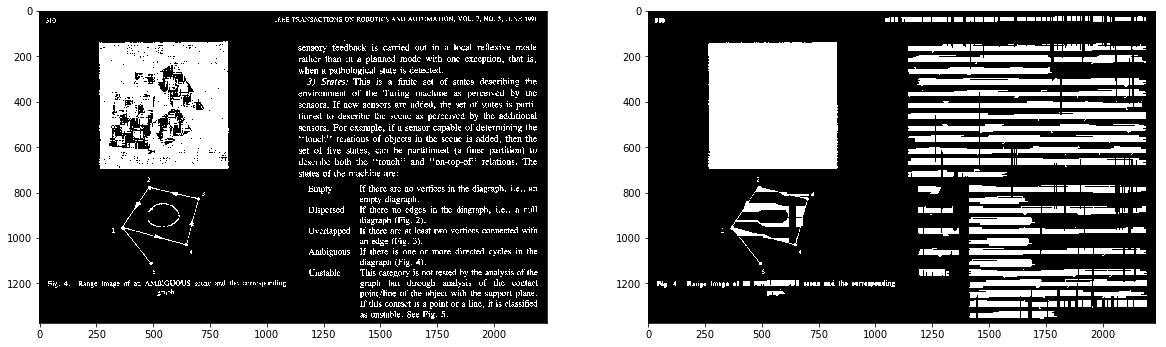

In [16]:
plt_intermediary_results(bitmap,bitmap_5)

## (6)

In [17]:
s_elem3 = np.ones((1,30),np.uint8)

In [18]:
bitmap_6 = cv2.morphologyEx(bitmap_5, cv2.MORPH_CLOSE, s_elem3)

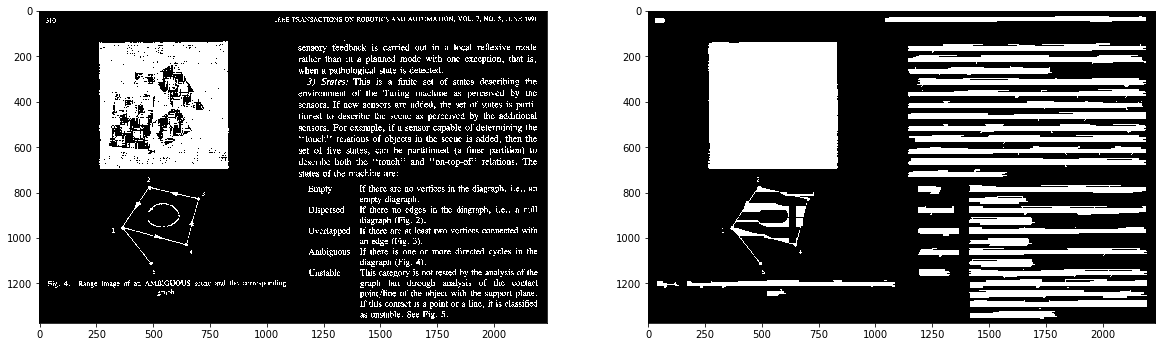

In [19]:
plt_intermediary_results(bitmap,bitmap_6)

## (7)

In [20]:
bitmap = cv2.bitwise_not(bitmap)

In [21]:
ret,thresh = cv2.threshold(bitmap_6,0,128,0)

In [22]:
im2, contours, hierarchy = cv2.findContours(bitmap_6,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [23]:
bitmap_box = bitmap.copy()

In [24]:
bounds = []
boxex = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    bounds.append((x,y,w,h))
    cv2.rectangle(bitmap_box, (x, y), (x+w, y+h), (0, 255, 0), 2)
 
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    boxex.append(box)
    
    cv2.drawContours(bitmap_box, [box], 0, (0, 0, 255))

In [25]:
cv2.drawContours(bitmap_box, contours, -1, (255, 255, 0), 1)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

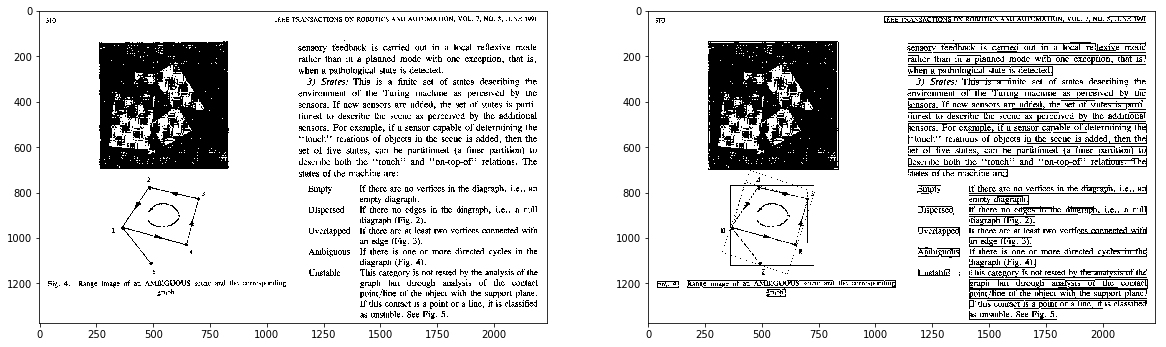

In [26]:
plt_intermediary_results(bitmap,bitmap_box)

## (8)

In [28]:
# (a)
def function_a(boxex_, img):
    output = []
    for c in boxex:
        c2 = c[1]
        c4 = c[3]
        img_c = img[c2[1]:c4[1],c2[0]:c4[0]]
        black_over_total = np.sum(img_c == 0) / (img_c.shape[0] * img_c.shape[1])
        if np.isnan(black_over_total):
            output.append(np.inf)
        else:
            output.append(black_over_total)
    return output

In [29]:
bounds_a = function_a(boxex,bitmap)

In [73]:
# (b)
def function_b(boxex_, img):
    output = []
    for c in boxex_:
        c2 = c[1]
        c4 = c[3]
        img_c = img[c2[1]:c4[1],c2[0]:c4[0]]
        count = 0
        
        # horizontal
        for i in range(img_c.shape[0]):
            for j in range(img_c.shape[1] - 1):
                if img_c[i,j] == 255 and img_c[i,j+1] == 0:
                    count = count + 1
        # vertical            
        for i in range(img_c.shape[1]):
            for j in range(img_c.shape[0] - 1):
                if img_c[j,i] == 255 and img_c[j+1,i] == 0:
                    count = count + 1
        
        transitions = count / np.sum(img_c == 0)
        
        if np.isnan(transitions):
            output.append(np.inf)
        else:
            output.append(transitions)
        
    return output

In [74]:
bounds_b = function_b(boxex,bitmap)

## (9)

In [40]:
len(bounds_a)

69

In [79]:
class_text_or_nor = []
for i in range(len(bounds_a)):
    if np.abs(bounds_a[i] - bounds_b[i]) <= 0.2:
        class_text_or_nor.append('text')
    else:
        class_text_or_nor.append('not text')

## (10)